### Get Ticker Universe

Conditions:
- available at Binance spot AND futures (so that we can hedge)
- available at upbit

In [1]:
import creds as creds
import ccxt.async_support as ccxt

upbit = ccxt.upbit(config={'apiKey': creds.upbit_api_key, 'secret': creds.upbit_api_secret, 'enableRateLimit': False})
binance = ccxt.binance(config={'apiKey':creds.api_key, 'secret': creds.api_secret, 'enableRateLimit': False})

upbit_markets = await upbit.fetch_markets()
upbit_markets = [market['base'] for market in upbit_markets if market['quote']=='KRW']

bn_markets = await binance.fetch_markets()
bn_spot_markets= [market['base'] for market in bn_markets if market['quote']=='USDT' and market['spot']]
bn_futures_markets= [market['base'] for market in bn_markets if market['quote']=='USDT' and market['swap']]

temp = []
futures_converter = {}
for ticker in bn_spot_markets:
    if ticker in bn_futures_markets:
        temp.append(ticker)
        futures_converter[ticker] = ticker
    elif '1000'+ticker  in bn_futures_markets:
        temp.append(ticker)
        futures_converter[ticker] = '1000'+ticker
    elif ticker in ['LUNA', 'DODO', 'BEAM']:
        temp.append(ticker)
bn_markets = temp

universe = []
futures_univ = []
for ticker in upbit_markets:
    if ticker in bn_markets:
        universe.append(ticker)
len(universe)

90

In [2]:
futures_universe = []
for ticker in universe:
    if ticker in futures_converter:
        futures_universe.append(futures_converter[ticker])
    elif ticker == 'BEAM':
        futures_universe.append('BEAMX')
    else:
        print(ticker)

### Download all ohlcv files

In [3]:
from Data.BinanceDownloader import BinanceDownloader
from Data.UpbitDownloader import UpbitDownloader

bd = BinanceDownloader()
ud = UpbitDownloader(rotate_ip = True)


from tqdm import tqdm

start_date = "2023-07-01"


# Do Binance or Upbit, one at a time
# for i,ticker in tqdm(enumerate(universe)):
    # df = await bd.get_ohlcv_monthly_full(ticker+'USDT', '5m', 'spot', start_date = start_date, num_threads = 10, output_dir = 'ohlcv_data/binance/')
    # df = await ud.get_ohlcv_full(ticker, 5, start_datetime = start_date, output_dir = 'ohlcv_data/upbit/', num_threads = 10, sleep = 0, rotate_ip=True)

for i,ticker in tqdm(enumerate(futures_universe)):
    df = await bd.get_ohlcv_monthly_full(ticker+'USDT', '5m', 'futures', start_date = start_date, num_threads = 10, output_dir = 'ohlcv_data/binance/')    

Starting API gateway in 1 regions.
Using 1 endpoints with name 'https://api.upbit.com - IP Rotate API' (0 new).


1it [00:01,  1.51s/it]

BTCUSDT_futures_5m.csv done


2it [00:03,  1.56s/it]

ETHUSDT_futures_5m.csv done


3it [00:04,  1.50s/it]

NEOUSDT_futures_5m.csv done


4it [00:05,  1.45s/it]

MTLUSDT_futures_5m.csv done


5it [00:07,  1.49s/it]

XRPUSDT_futures_5m.csv done


6it [00:08,  1.49s/it]

ETCUSDT_futures_5m.csv done


7it [00:10,  1.41s/it]

SNTUSDT_futures_5m.csv done


8it [00:11,  1.43s/it]

WAVESUSDT_futures_5m.csv done


9it [00:12,  1.35s/it]

XEMUSDT_futures_5m.csv done


10it [00:14,  1.35s/it]

QTUMUSDT_futures_5m.csv done


11it [00:15,  1.25s/it]

LSKUSDT_futures_5m.csv done


12it [00:16,  1.23s/it]

STEEMUSDT_futures_5m.csv done


13it [00:17,  1.31s/it]

XLMUSDT_futures_5m.csv done


14it [00:19,  1.29s/it]

ARKUSDT_futures_5m.csv done


15it [00:20,  1.28s/it]

STORJUSDT_futures_5m.csv done


16it [00:21,  1.30s/it]

ADAUSDT_futures_5m.csv done


17it [00:22,  1.27s/it]

POWRUSDT_futures_5m.csv done


18it [00:24,  1.50s/it]

ICXUSDT_futures_5m.csv done


19it [00:26,  1.51s/it]

EOSUSDT_futures_5m.csv done


20it [00:27,  1.49s/it]

TRXUSDT_futures_5m.csv done


21it [00:29,  1.43s/it]

SCUSDT_futures_5m.csv done


22it [00:30,  1.44s/it]

ONTUSDT_futures_5m.csv done


23it [00:32,  1.42s/it]

ZILUSDT_futures_5m.csv done


24it [00:33,  1.35s/it]

POLYXUSDT_futures_5m.csv done


25it [00:34,  1.41s/it]

ZRXUSDT_futures_5m.csv done


26it [00:36,  1.35s/it]

LOOMUSDT_futures_5m.csv done


27it [00:37,  1.40s/it]

BCHUSDT_futures_5m.csv done


28it [00:39,  1.43s/it]

BATUSDT_futures_5m.csv done


29it [00:40,  1.48s/it]

IOSTUSDT_futures_5m.csv done


30it [00:41,  1.38s/it]

CVCUSDT_futures_5m.csv done


31it [00:43,  1.42s/it]

IOTAUSDT_futures_5m.csv done


32it [00:44,  1.37s/it]

HIFIUSDT_futures_5m.csv done


33it [00:45,  1.32s/it]

ONGUSDT_futures_5m.csv done


34it [00:47,  1.33s/it]

GASUSDT_futures_5m.csv done


35it [00:48,  1.37s/it]

KNCUSDT_futures_5m.csv done
BSVUSDT already exists in the directory. Skipping...


37it [00:50,  1.07s/it]

THETAUSDT_futures_5m.csv done


38it [00:51,  1.15s/it]

MANAUSDT_futures_5m.csv done


39it [00:52,  1.24s/it]

ANKRUSDT_futures_5m.csv done


40it [00:54,  1.35s/it]

ATOMUSDT_futures_5m.csv done


41it [00:55,  1.32s/it]

WAXPUSDT_futures_5m.csv done


42it [00:57,  1.42s/it]

HBARUSDT_futures_5m.csv done


43it [00:58,  1.35s/it]

STPTUSDT_futures_5m.csv done


44it [01:00,  1.36s/it]

VETUSDT_futures_5m.csv done


45it [01:01,  1.38s/it]

CHZUSDT_futures_5m.csv done


46it [01:02,  1.39s/it]

STMXUSDT_futures_5m.csv done


47it [01:04,  1.40s/it]

KAVAUSDT_futures_5m.csv done


48it [01:05,  1.43s/it]

LINKUSDT_futures_5m.csv done


49it [01:07,  1.41s/it]

XTZUSDT_futures_5m.csv done


50it [01:08,  1.44s/it]

SXPUSDT_futures_5m.csv done


51it [01:10,  1.46s/it]

DOTUSDT_futures_5m.csv done


52it [01:11,  1.36s/it]

STRAXUSDT_futures_5m.csv done


53it [01:12,  1.25s/it]

GLMUSDT_futures_5m.csv done


54it [01:13,  1.29s/it]

SANDUSDT_futures_5m.csv done


55it [01:15,  1.31s/it]

DOGEUSDT_futures_5m.csv done


56it [01:16,  1.35s/it]

FLOWUSDT_futures_5m.csv done


57it [01:17,  1.33s/it]

AXSUSDT_futures_5m.csv done


58it [01:19,  1.35s/it]

STXUSDT_futures_5m.csv done
1000XECUSDT already exists in the directory. Skipping...


60it [01:20,  1.04s/it]

SOLUSDT_futures_5m.csv done


61it [01:21,  1.12s/it]

MATICUSDT_futures_5m.csv done


62it [01:23,  1.19s/it]

AAVEUSDT_futures_5m.csv done


63it [01:24,  1.24s/it]

1INCHUSDT_futures_5m.csv done


64it [01:26,  1.32s/it]

ALGOUSDT_futures_5m.csv done


65it [01:27,  1.34s/it]

NEARUSDT_futures_5m.csv done


66it [01:29,  1.39s/it]

AVAXUSDT_futures_5m.csv done
TUSDT already exists in the directory. Skipping...


68it [01:30,  1.07s/it]

CELOUSDT_futures_5m.csv done


69it [01:31,  1.15s/it]

GMTUSDT_futures_5m.csv done


70it [01:33,  1.23s/it]

APTUSDT_futures_5m.csv done
1000SHIBUSDT already exists in the directory. Skipping...


72it [01:34,  1.02it/s]

MASKUSDT_futures_5m.csv done


73it [01:36,  1.15s/it]

ARBUSDT_futures_5m.csv done


74it [01:38,  1.33s/it]

EGLDUSDT_futures_5m.csv done


75it [01:40,  1.63s/it]

SUIUSDT_futures_5m.csv done


76it [01:42,  1.59s/it]

GRTUSDT_futures_5m.csv done


77it [01:43,  1.59s/it]

BLURUSDT_futures_5m.csv done


78it [01:45,  1.56s/it]

IMXUSDT_futures_5m.csv done


79it [01:46,  1.49s/it]

SEIUSDT_futures_5m.csv done


80it [01:48,  1.54s/it]

MINAUSDT_futures_5m.csv done


81it [01:49,  1.53s/it]

ASTRUSDT_futures_5m.csv done


82it [01:51,  1.47s/it]

IDUSDT_futures_5m.csv done


83it [01:52,  1.39s/it]

PYTHUSDT_futures_5m.csv done


84it [01:53,  1.32s/it]

AUCTIONUSDT_futures_5m.csv done


85it [01:54,  1.32s/it]

STGUSDT_futures_5m.csv done


86it [01:55,  1.25s/it]

BEAMXUSDT_futures_5m.csv done


87it [01:56,  1.09s/it]

ZROUSDT_futures_5m.csv done


88it [01:57,  1.09s/it]

JUPUSDT_futures_5m.csv done


89it [01:59,  1.23s/it]

ENSUSDT_futures_5m.csv done


90it [02:00,  1.34s/it]

PENDLEUSDT_futures_5m.csv done


### Collect Samples

Noise Filters
- Whipsaw Filter: Use rolling average as the sampling function to filter out premiums that are too short-lived to trade
- Liquidity Filter: Use 1-week average trading volume per 5 min to filter out low-liquidity opportunities

In [7]:
import pandas as pd
df_result = pd.DataFrame()
btc_bn = pd.read_csv("ohlcv_data/binance/"+"BTCUSDT_spot_5m.csv", index_col = 'Time').drop_duplicates()
btc_bn.index = pd.to_datetime(btc_bn.index)

btc_up = pd.read_csv("ohlcv_data/upbit/"+"BTC_spot_5m.csv", index_col = 'Time')[::-1].drop_duplicates()
btc_up.index = pd.to_datetime(btc_up.index)

from tqdm import tqdm
for ticker in tqdm(universe):
    if ticker in ['BTC', 'BSV', 'T', 'BEAM']:
        continue
    
    futures_ticker = futures_converter[ticker]
    target_bn = pd.read_csv("ohlcv_data/binance/"+ticker+"USDT_spot_5m.csv", index_col = 'Time').drop_duplicates()
    target_bn.index = pd.to_datetime(target_bn.index)

    target_bn_fut = pd.read_csv("ohlcv_data/binance/"+futures_ticker+"USDT_futures_5m.csv", index_col = 'Time').drop_duplicates()
    target_bn_fut.index = pd.to_datetime(target_bn_fut.index)

    target_up = pd.read_csv("ohlcv_data/upbit/"+ticker+"_spot_5m.csv", index_col = 'Time')[::-1].drop_duplicates()
    target_up.index = pd.to_datetime(target_up.index)

    premium = (target_up.Close/target_bn.Close)/(btc_up.Close/btc_bn.Close)-1
    premium = pd.DataFrame(premium).dropna()
    premium['average'] = premium.Close.rolling(6).mean()
    premium['average_after_30m'] = premium.Close.rolling(6).mean().shift(-9) #  +- 15min
    premium['average_after_1hr'] = premium.Close.rolling(6).mean().shift(-15) # +- 15min
    premium = premium.dropna()
    

    temp =premium[abs(premium.average)>=0.03].copy()
    temp['date'] =temp.index.date
    temp = temp[~temp.date.duplicated(keep='first')]
    temp['kst'] = temp.index.tz_convert('Asia/Seoul')
    temp['ticker'] = ticker
    forex = 1375
    temp['volume_6h'] = round((target_up.PriceVolume.drop_duplicates().rolling(12*6).mean()/forex/1000).loc[temp.index])
    temp['volume_1d'] = round((target_up.PriceVolume.drop_duplicates().rolling(12*24).mean()/forex/1000).loc[temp.index])
    temp['volume_1w'] = round((target_up.PriceVolume.drop_duplicates().rolling(12*24*7).mean()/forex/1000).loc[temp.index])
    
    temp['futures_start'] = target_bn_fut.index[0]
    temp['futures_end'] = target_bn_fut.index[-1]

    df_result = pd.concat([df_result, temp], axis=0)

df_result = df_result.dropna().sort_index()

100%|██████████| 90/90 [01:34<00:00,  1.05s/it]


KeyError: 'Time'

In [10]:
df_result['future_available'] = (df_result.index>df_result['futures_start'])&(df_result.index<df_result['futures_end'])


In [231]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
# df_filtered = df_result[(df_result['future_available']) & 
#                         (df_result['volume_6h'] > 250) & 
#                         (df_result['volume_1d'] > 250) & 
#                         (df_result['volume_1w'] > 250) & 
#                         (~df_result['ticker'].isin(['STRAX', 'POWR']))].reset_index()

df_filtered = df_result[(df_result['future_available']) & 
                        # (df_result['volume_6h'] > 250) & 
                        (df_result['volume_1d'] > 300) & 
                        # (df_result['volume_1w'] > 250) & 
                        (~df_result['ticker'].isin(['STRAX', 'POWR', 'IOTA', 'APT', 'FLOW', 'SOL', 'MTL']))].reset_index()
# IOTA 입출금 중단이였음. 
df_filtered

,Time,Close,average,average_after_30m,average_after_1hr,date,kst,ticker,volume_6h,volume_1d,volume_1w,futures_start,futures_end,future_available
0,2023-07-10 01:15:00+00:00,-0.136005,-0.042413,-0.006515,-0.005405,2023-07-10,2023-07-10 10:15:00+09:00,WAVES,1287.0,546.0,248.0,2023-07-01 00:00:00+00:00,2024-07-31 23:55:00+00:00,True
1,2023-07-13 18:30:00+00:00,0.034597,0.032777,0.002372,0.002229,2023-07-13,2023-07-14 03:30:00+09:00,ADA,1441.0,524.0,97.0,2023-07-01 00:00:00+00:00,2024-07-31 23:55:00+00:00,True
2,2023-07-23 06:05:00+00:00,-0.068693,-0.034080,-0.297523,-0.132748,2023-07-23,2023-07-23 15:05:00+09:00,STMX,2531.0,1400.0,364.0,2023-07-01 00:00:00+00:00,2024-07-31 23:55:00+00:00,True
3,2023-07-28 09:55:00+00:00,-0.055441,-0.030291,0.003198,-0.002065,2023-07-28,2023-07-28 18:55:00+09:00,STMX,840.0,475.0,598.0,2023-07-01 00:00:00+00:00,2024-07-31 23:55:00+00:00,True
4,2023-08-02 12:25:00+00:00,0.048470,0.030712,0.012454,0.123675,2023-08-02,2023-08-02 21:25:00+09:00,KNC,2053.0,543.0,196.0,2023-07-01 00:00:00+00:00,2024-07-31 23:55:00+00:00,True
5,2023-08-05 00:40:00+00:00,0.031775,0.032209,0.048878,0.036106,2023-08-05,2023-08-05 09:40:00+09:00,SC,1318.0,488.0,89.0,2023-07-01 00:00:00+00:00,2024-07-31 23:55:00+00:00,True
6,2023-08-17 21:50:00+00:00,0.037967,0.031642,-0.001986,-0.002190,2023-08-17,2023-08-18 06:50:00+09:00,XRP,2895.0,1100.0,348.0,2023-07-01 00:00:00+00:00,2024-07-31 23:55:00+00:00,True
7,2023-08-30 10:15:00+00:00,-0.037116,-0.031463,-0.023591,-0.017764,2023-08-30,2023-08-30 19:15:00+09:00,SEI,767.0,494.0,153.0,2023-08-17 02:30:00+00:00,2024-07-31 23:55:00+00:00,True
8,2023-09-16 17:00:00+00:00,0.118985,0.032332,-0.000619,0.000675,2023-09-16,2023-09-17 02:00:00+09:00,HIFI,1204.0,1590.0,752.0,2023-09-16 14:30:00+00:00,2024-07-31 23:55:00+00:00,True
9,2023-09-21 00:00:00+00:00,0.193433,0.032514,0.159382,0.182231,2023-09-21,2023-09-21 09:00:00+09:00,IMX,1726.0,490.0,72.0,2023-07-01 00:00:00+00:00,2024-07-31 23:55:00+00:00,True


In [241]:
import numpy as np
cost = 0.01
profit = df_filtered.average_after_1hr*np.sign(df_filtered.average) - cost
# profit = df_filtered.average_after_30m*np.sign(df_filtered.average) - cost

In [242]:
print('sharpe:',profit.mean()/profit.std()*np.sqrt(len(profit)))

sharpe: 3.4297046572889185


In [243]:
print('zscore:',profit.mean()/profit.std())

zscore: 0.5056823637042392


In [244]:
profit.mean(), profit.sum()

(0.020837796343399478, 0.958538631796376)

두가지 경우가 있음.
1) 한국이 더 낮을떄: 
- 이럴땐 업비트에 미리 둔 돈으로 사서 바로 보내면 즉시 수익
- 돈이 없다면 바이낸스에서 transfer이 빠른애로 보내야함. 리서치 필요: USDT on Tron, Solana, etc. USDT는 헷징 코스트가 없음. 테스트 필요.
2) 한국이 더 높을떄: 바이낸스에서 해당 토큰을 사서 바로 보내야함. 

중요: 입출금 가능여부
- 업비트 공지확인
- 바이낸스 출금가능여부 확인

<Axes: >

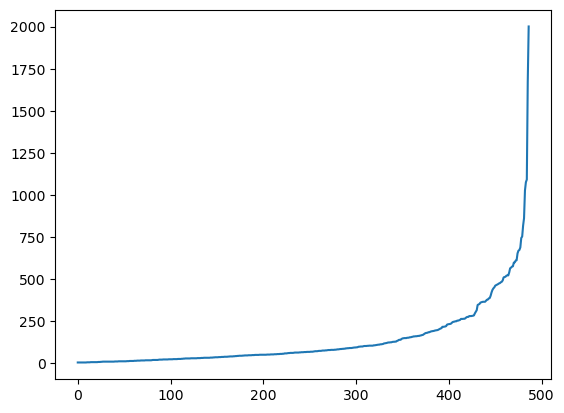

In [19]:
# Trading Volume distribution
df_result.sort_values(by='volume').reset_index().volume.plot()